# Heart Disease Predisction using Decision tree

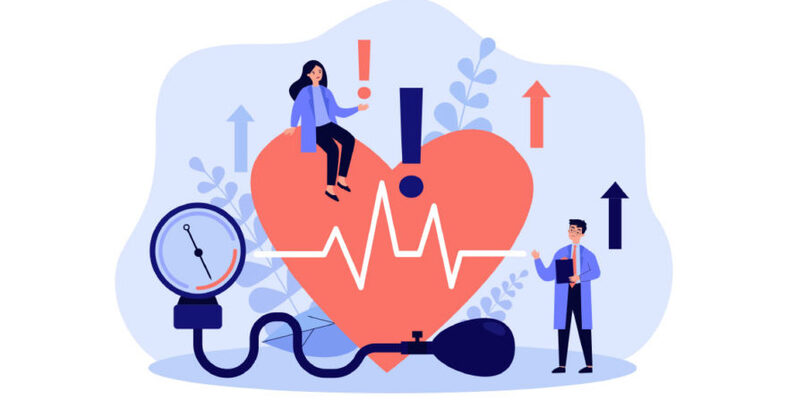

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart_v2.csv')

In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [6]:
df.shape

(270, 5)

In [7]:
df['heart disease'].value_counts()

heart disease
0    150
1    120
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('heart disease', axis = 1)

In [10]:
y = df['heart disease']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42 )

In [12]:
X_train.shape,X_test.shape

((189, 4), (81, 4))

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier(max_depth = 3)

In [15]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
from IPython.display import Image
from io import StringIO
import six
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [17]:
dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, filled = True, rounded = True,
               feature_names = X.columns, class_names=['No Disease', 'Disease'])

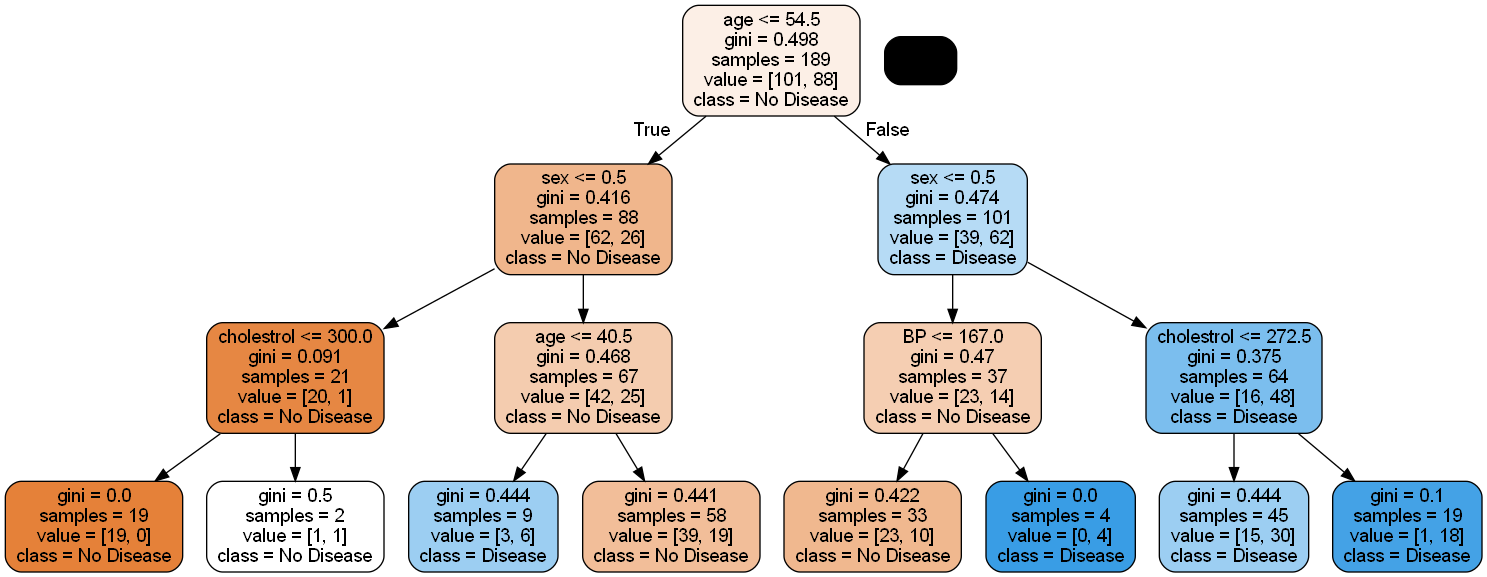

In [18]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Evaluate the model performance

In [19]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:
accuracy_score(y_train, y_train_pred)

0.7407407407407407

In [22]:
confusion_matrix(y_train, y_train_pred)

array([[82, 19],
       [30, 58]], dtype=int64)

In [23]:
accuracy_score(y_test, y_test_pred)

0.6049382716049383

In [24]:
confusion_matrix(y_test, y_test_pred)

array([[35, 14],
       [18, 14]], dtype=int64)

 ### Create helper function to evaluate the model perfromance ansd create the graph for Dt

In [26]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt, out_file = dot_data, filled = True, rounded = True,
               feature_names = X.columns, class_names=['No Disease', 'Disease'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    return graph

In [31]:
def evaluate_model(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    print('Train set performance')
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print('='*50)
    print('test set performance')
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))     

In [32]:
evaluate_model(dt)

Train set performance
0.7407407407407407
[[82 19]
 [30 58]]
test set performance
0.6049382716049383
[[35 14]
 [18 14]]


In [77]:
from sklearn import tree

feature_names = ['age', 'sex', 'BP', 'cholestrol']
class_names=['No Disease', 'Disease']

Decision Tree without any Hyper parametyer setting

In [49]:
dt_default = DecisionTreeClassifier(random_state = 42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

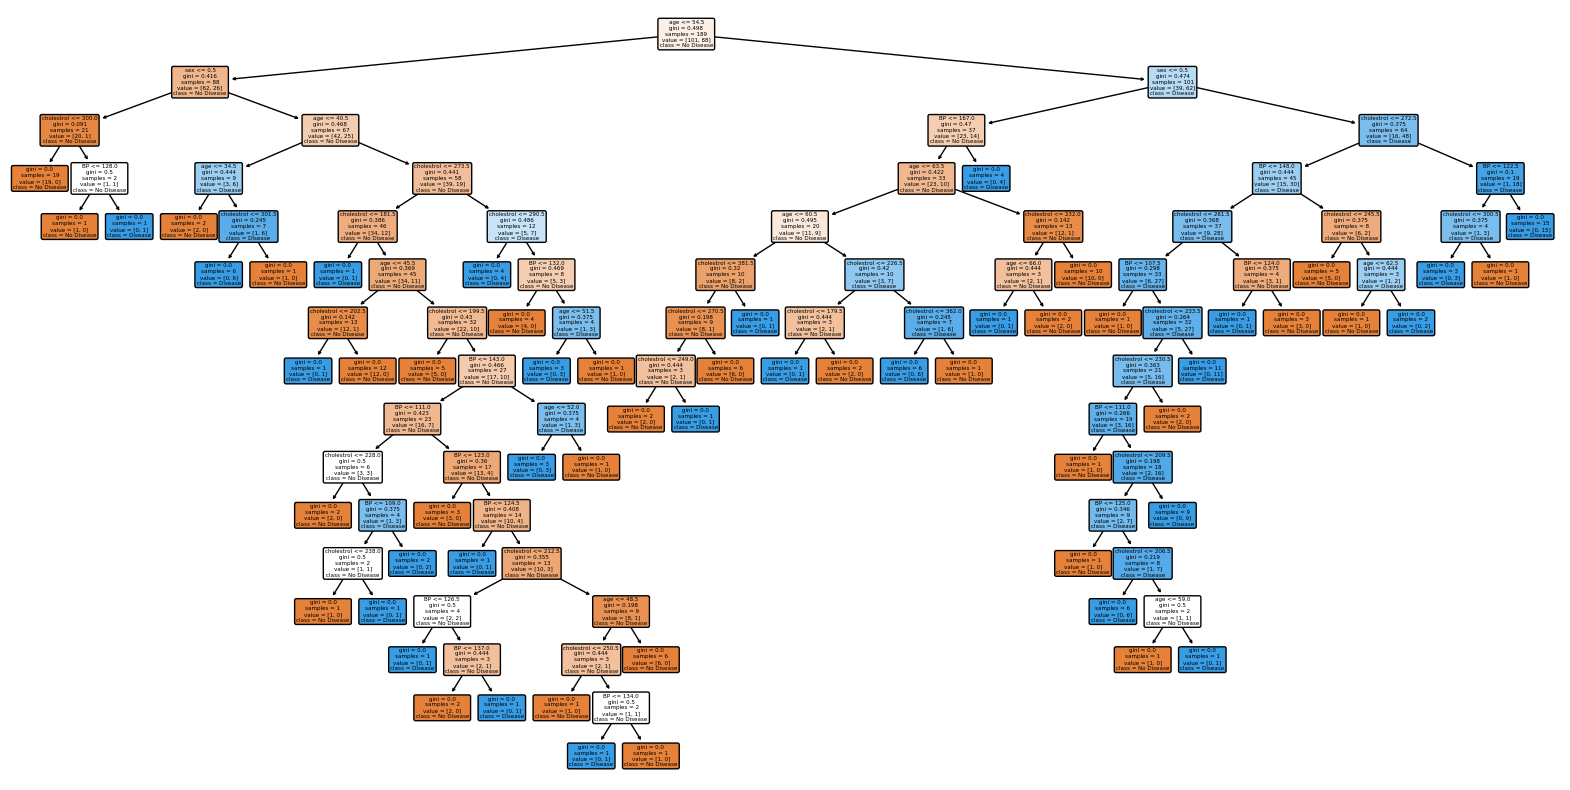

In [78]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_default, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()

In [51]:
evaluate_model(dt_default)

Train set performance
1.0
[[101   0]
 [  0  88]]
test set performance
0.6296296296296297
[[31 18]
 [12 20]]


Severly overfitting on the train set

In [52]:
dt_graph = DecisionTreeClassifier(max_depth=3,random_state = 42)
dt_graph.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

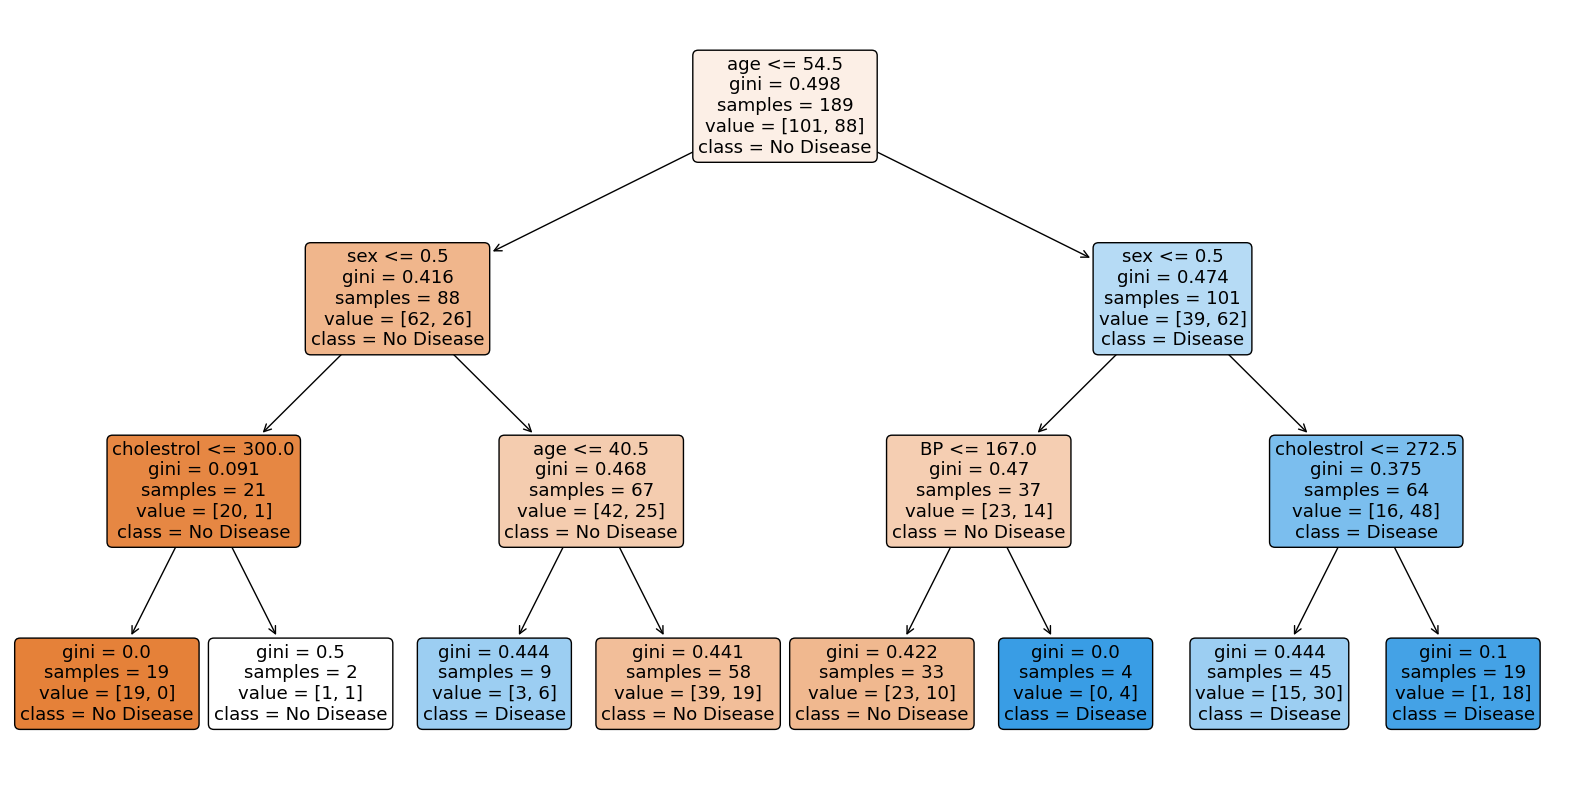

In [79]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_graph, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()

In [54]:
evaluate_model(dt_graph)

Train set performance
0.7407407407407407
[[82 19]
 [30 58]]
test set performance
0.6049382716049383
[[35 14]
 [18 14]]


In [55]:
dt_leaf = DecisionTreeClassifier(min_samples_leaf=20,random_state = 42)
dt_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

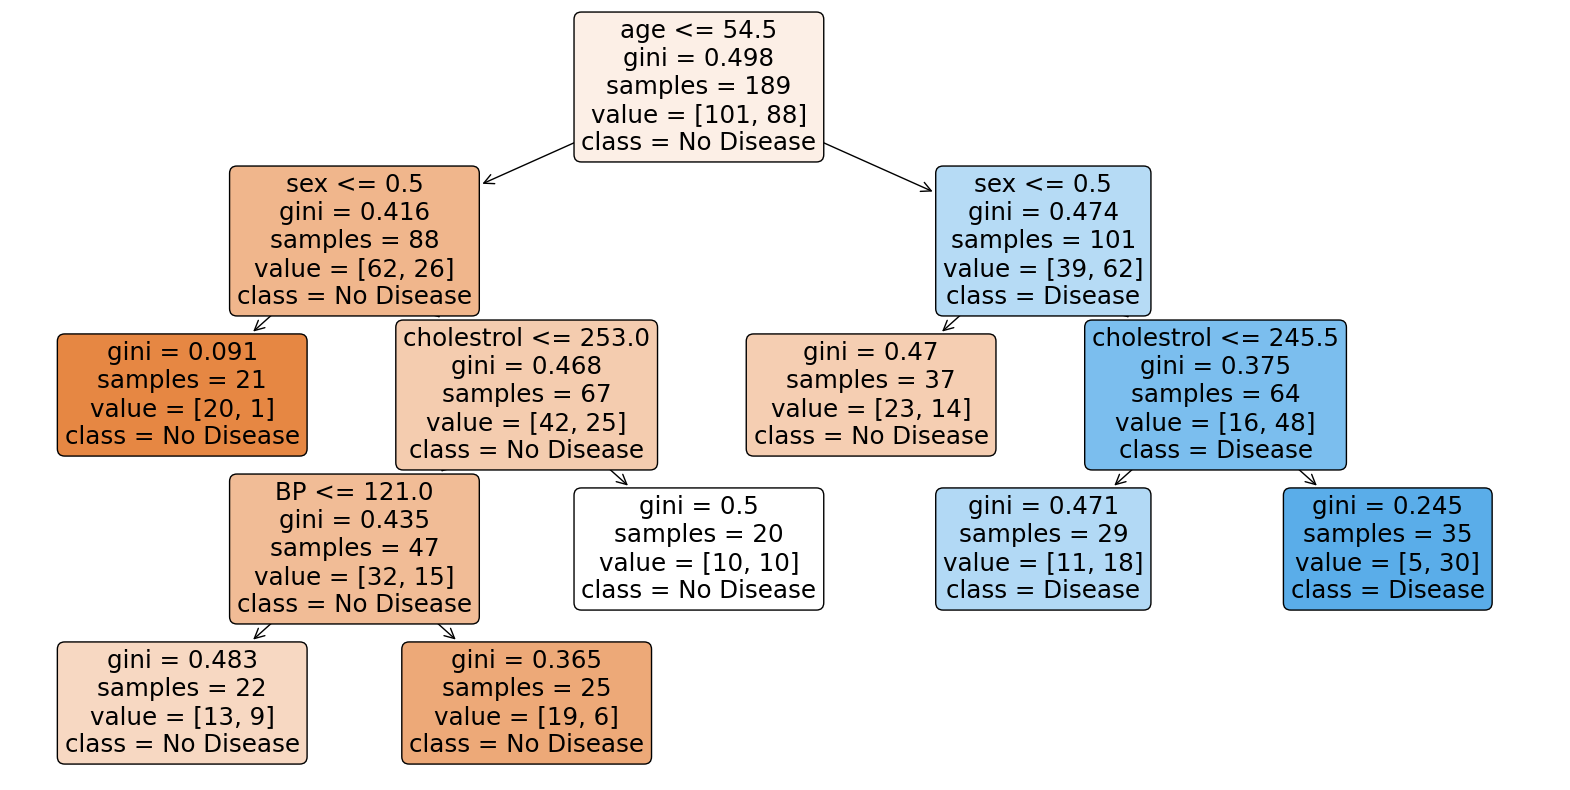

In [80]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_leaf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()

In [60]:
evaluate_model(dt_leaf)

Train set performance
0.7037037037037037
[[85 16]
 [40 48]]
test set performance
0.6419753086419753
[[38 11]
 [18 14]]


# Entropy in place of Gini

In [61]:
dt_leaf_ent = DecisionTreeClassifier(min_samples_leaf=20,random_state = 42,criterion='entropy')
dt_leaf_ent.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

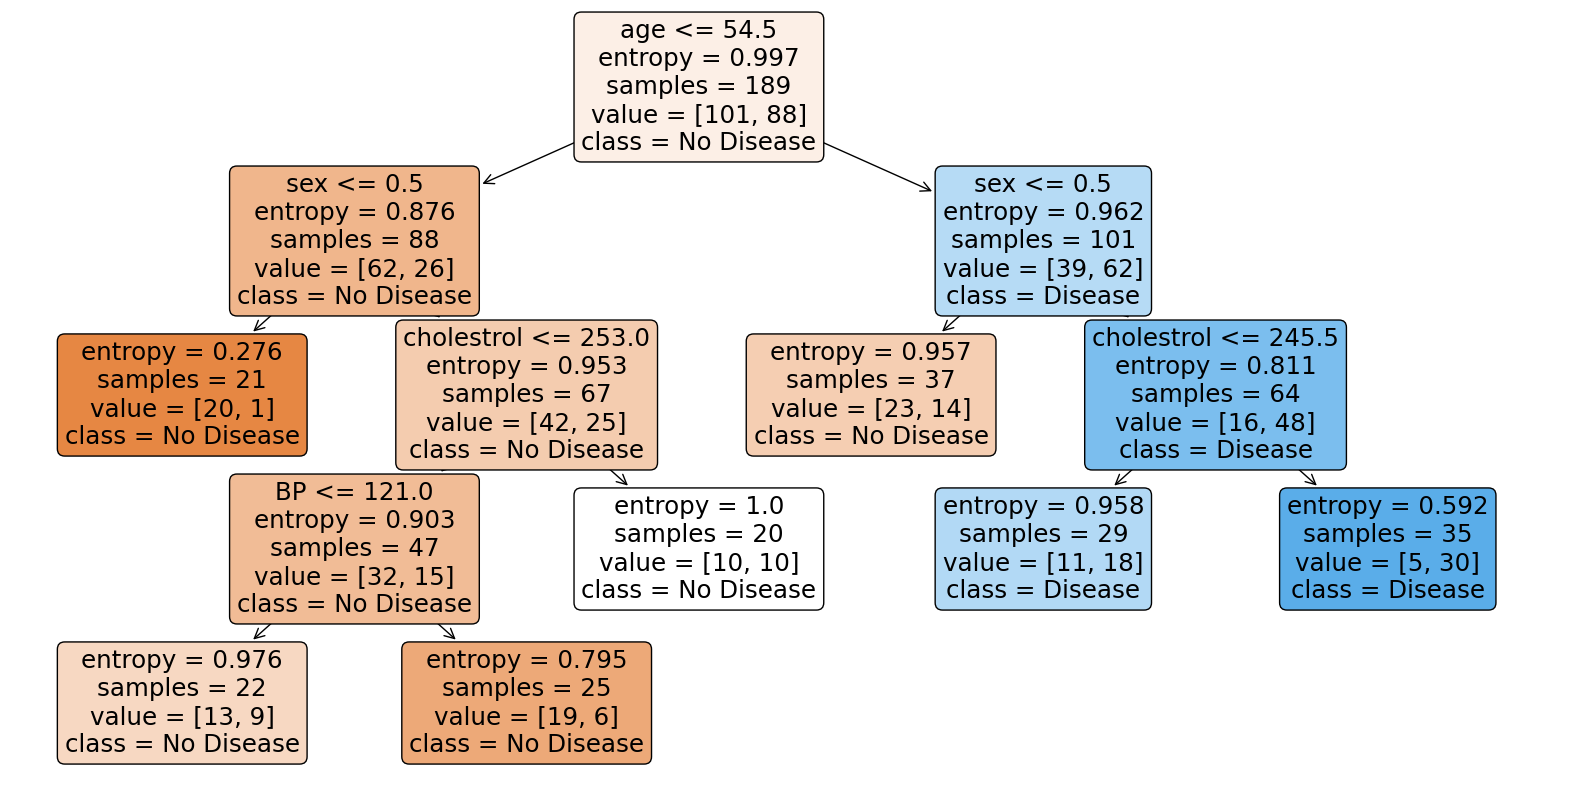

In [81]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_leaf_ent, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()

In [82]:
evaluate_model(dt_leaf_ent)

Train set performance
0.7037037037037037
[[85 16]
 [40 48]]
test set performance
0.6419753086419753
[[38 11]
 [18 14]]


### Hyp param tuning grid search cv

In [83]:
dt = DecisionTreeClassifier(random_state = 42)

In [88]:
from sklearn.model_selection import GridSearchCV

In [92]:
params = {
    'max_depth' : [2,3,5,10,20],
    'min_samples_leaf' : [5,10,20,50,100],
    'criterion' : ['gini','entropy']    
}

In [95]:
# 4 fold cross validation
grid_search = GridSearchCV(estimator = dt,
            param_grid = params,
            cv = 4, verbose = 1,
            scoring = 'accuracy')

In [96]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: total: 484 ms
Wall time: 532 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [98]:
grid_search.cv_results_

{'mean_fit_time': array([0.00163472, 0.00153017, 0.0011673 , 0.0018186 , 0.00139517,
        0.00127214, 0.0011639 , 0.0010367 , 0.00100422, 0.00139856,
        0.00104773, 0.00137991, 0.00165612, 0.00150698, 0.00112998,
        0.00188917, 0.00136912, 0.0014357 , 0.00168705, 0.00115746,
        0.00138515, 0.001526  , 0.00137937, 0.00153971, 0.00171739,
        0.00188082, 0.00140744, 0.00113177, 0.00125426, 0.00153363,
        0.00137705, 0.00149935, 0.00137877, 0.00137681, 0.00123841,
        0.00112784, 0.00115824, 0.00175852, 0.00125122, 0.00198817,
        0.00206459, 0.00100654, 0.00142258, 0.00153542, 0.00114036,
        0.00135982, 0.00174826, 0.00153494, 0.00132328, 0.00100493]),
 'std_fit_time': array([4.04334662e-04, 7.33697646e-04, 1.50387610e-04, 4.51425649e-04,
        4.21158014e-04, 4.33935122e-04, 1.50889991e-04, 2.55532975e-05,
        7.06400675e-04, 3.93786737e-04, 6.54563218e-05, 4.13353373e-04,
        4.82657594e-04, 5.05276512e-04, 2.21303851e-04, 5.50012010e-0

In [99]:
cv_df = pd.DataFrame(grid_search.cv_results_)

In [101]:
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001635,0.000404,0.001467,0.000100,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
1,0.001530,0.000734,0.000260,0.000450,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
2,0.001167,0.000150,0.000726,0.000507,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
3,0.001819,0.000451,0.000629,0.000437,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.001395,0.000421,0.000983,0.000708,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [103]:
grid_search.best_score_

0.6669991134751774

In [104]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [105]:
dt_best = grid_search.best_estimator_

In [106]:
evaluate_model(dt_best)

Train set performance
0.7195767195767195
[[82 19]
 [34 54]]
test set performance
0.6172839506172839
[[36 13]
 [18 14]]


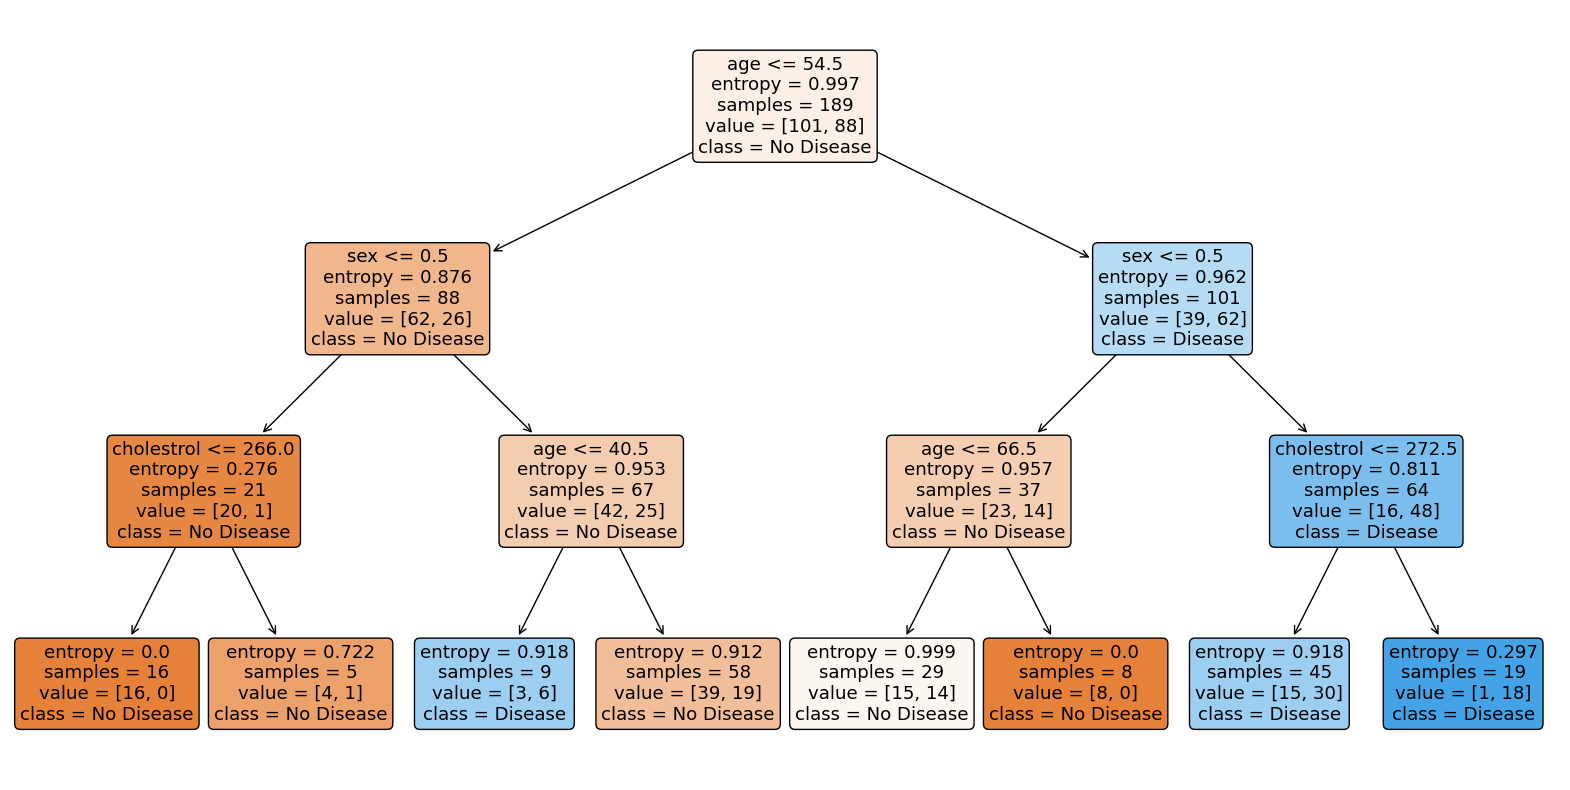

In [107]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_best, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()